In [1]:
#### installing necessary libraries
# ! python3 -m spacy download en_core_web_lg
# ! python3 -m pip install paddlepaddle
# ! pip3 install paddleocr
# ! pip3 install borb==2.0.27
# ! pip3 install pytesseract
# ! pip3 install ftfy
# ! pip3 install tesseract
# ! sudo apt install tesseract-ocr
# ! pip install keras-ocr
# ! python3 -m pip install spacy
# ! pip install nltk
# ! pip install pyforest
# ! python -m spacy train config.cfg --output ./models --paths.train ./train.spacy --paths.dev ./dev.spacy
# ! pip install datefinder
# ! pip install pillow
# ! pip install lexnlp

In [2]:
#### Necessary Imports

import argparse
import re
import string
import sys
import warnings
from urllib.parse import urlparse
import cv2
import datefinder
import imutils
import numpy as np
import pytesseract
from imutils.perspective import four_point_transform
from matplotlib import pyplot as plt
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from PIL import Image
from pyforest import *
warnings.filterwarnings("ignore")
%matplotlib inline
from wordcloud import STOPWORDS, WordCloud

In [3]:
#### reading dataset extracted from images

path = "../documentations and prior code/datasets_extracted/"
sys.path.append(path)
train_csv = path + "train_df.csv"
test_csv = path + "test_df.csv"

<IPython.core.display.Javascript object>

In [4]:
#### extracted data train and test

train_df = pd.read_csv(train_csv)
train_df = train_df.iloc[:, 1:]
test_df = pd.read_csv(test_csv)
test_df = test_df.iloc[:, 1:]
display(
    train_df,
    test_df,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,image_type,extracted_text
0,Final Project/installation files/files/jpg//te...,PATSARA THAI RESTAURAN 528 CARNARVON ST V3L1...
1,l Project/installation files/files/jpg//testin...,VRAKBANK ALKANZJEWELLERY LL PURCHASE 00 0...
2,l Project/installation files/files/jpg//testin...,GRASS ROOTS CATEKSA 12666 T2ND AVE. CEDAR S...
3,Final Project/installation files/files/jpg//te...,World Famous Chicken World Ltd Address:1-12...


,image_type,extracted_text
0,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,CHEF S KEBAB 6225 FRASERHWY SURREY BC V4N O...
1,rive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fin...,YELLOW CAB #300 1441 CLARK DR VANCOUVER BC...
2,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Quick 60 QUESADA-BURRITOS&TACOS AcrossSurre...
3,e/MyDrive/Colab Notebooks/CPSE 4830 OCR Final ...,"800 Carnavon Street, Unit 230 New Westminste..."
4,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Shawarna Palace 115-7218 King George Blvd S...
5,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,SHAWARMA PALACE 7218 KING GEORGE BLVD SUITE...
6,ive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fina...,Quick 68 CHRONIC TACOS ServerSharandeep P...
7,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,"Canada Computers 5068-B Kingsway Burnaby,BC..."
8,ve/MyDrive/Colab Notebooks/CPSE 4830 OCR Final...,** Pick-up ** Take-Out 02/01/2020 11:05 AM ...
9,rive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fin...,GULBERG TANDOOR & DONAIR 119-12578 72ND AVEN...


In [5]:
#### extracting length of each description

train_df["text_length"] = train_df["extracted_text"].apply(len)
train_df.head(10)

,image_type,extracted_text,text_length
0,Final Project/installation files/files/jpg//te...,PATSARA THAI RESTAURAN 528 CARNARVON ST V3L1...,370
1,l Project/installation files/files/jpg//testin...,VRAKBANK ALKANZJEWELLERY LL PURCHASE 00 0...,227
2,l Project/installation files/files/jpg//testin...,GRASS ROOTS CATEKSA 12666 T2ND AVE. CEDAR S...,349
3,Final Project/installation files/files/jpg//te...,World Famous Chicken World Ltd Address:1-12...,587


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='text_length', ylabel='Density'>

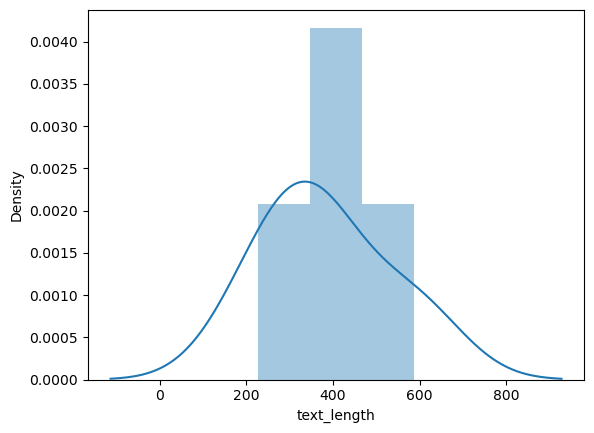

In [6]:
#### distribution of lengths

sns.distplot(train_df["text_length"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

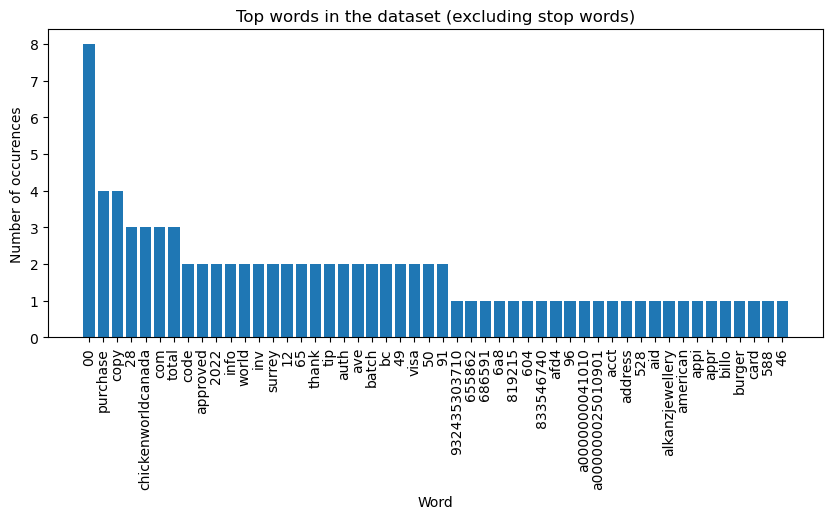

In [7]:
#### most common word 

def get_top_n_words(
    n_top_words,
    count_vectorizer,
    text_data,
):
    """
    returns a tuple of the top n words in a sample and their
    accompanying counts, given a CountVectorizer object and text sample
    """
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(
        vectorized_headlines,
        axis=0,
    )
    word_indices = np.flip(
        np.argsort(vectorized_total)[0, :],
        1,
    )
    word_values = np.flip(
        np.sort(vectorized_total)[0, :],
        1,
    )

    word_vectors = np.zeros(
        (
            n_top_words,
            vectorized_headlines.shape[1],
        )
    )
    for i in range(n_top_words):
        word_vectors[
            i,
            word_indices[0, i],
        ] = 1

    words = [
        word[0].encode("ascii").decode("utf-8")
        for word in count_vectorizer.inverse_transform(word_vectors)
    ]

    return (
        words,
        word_values[
            0,
            :n_top_words,
        ].tolist()[0],
    )


""" calling the above function """

count_vectorizer = CountVectorizer(stop_words="english")
(words, word_values,) = get_top_n_words(
    n_top_words=50,
    count_vectorizer=count_vectorizer,
    text_data=train_df["extracted_text"],
)

"""plotting Top Common Words"""

(
    fig,
    ax,
) = plt.subplots(figsize=(10, 4))
ax.bar(
    range(len(words)),
    word_values,
)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(
    words,
    rotation="vertical",
)
ax.set_title("Top words in the dataset (excluding stop words)")
ax.set_xlabel("Word")
ax.set_ylabel("Number of occurences")
plt.show()

In [8]:
def token_message(
    message,
):
    """Tokening messages"""
    
    punc_removed = [w for w in message]
    punc_removed_join = "".join(punc_removed)
    punc_removed_join_clean = [
        word
        for word in punc_removed_join.split()
        if word.lower() not in stopwords.words("english")
    ]
    punc_removed_clean_word = [word for word in punc_removed_join_clean if len(word) > 1]
    return punc_removed_clean_word


train_df["token_text"] = train_df["extracted_text"].apply(token_message)

In [9]:
def lemmatizing(
    words,
):
    """Lemmatizing tokens"""
    
    lemmatizer = WordNetLemmatizer()
    lemma_list = []
    for word in words:
        lemma_list.append(lemmatizer.lemmatize(word))
    return lemma_list


train_df["lemma_text"] = train_df["token_text"].apply(lemmatizing)

In [10]:
#### Plotting wordcloud

(words, word_values,) = get_top_n_words(
    n_top_words=200,
    count_vectorizer=count_vectorizer,
    text_data=train_df["extracted_text"],
)


STOPWORDS = set(STOPWORDS)
warnings.filterwarnings("ignore")
wordcloud2 = WordCloud(
    width=2000,
    height=2000,
    background_color="white",
    stopwords=set(STOPWORDS),
    min_font_size=10,
).generate(",".join(words))
plt.figure(figsize=(12, 12))
plt.imshow(
    wordcloud2,
    interpolation="bilinear",
)
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: index 157 is out of bounds for axis 1 with size 157

In [11]:
#### extracting dates
import datefinder
date_list = {}
for (
    idx,
    text,
) in train_df["extracted_text"].iteritems():
    matches = datefinder.find_dates(text)
    dates = []
    for m in matches:
        d = m.date().strftime("%Y-%m-%d")
        dates.append(d)
        dates_str = ",".join(dates)
    date_list[idx] = dates_str

date_df = pd.DataFrame.from_dict(
    date_list,
    orient="index",
)
train_df2 = train_df.merge(
    date_df,
    left_index=True,
    right_index=True,
    how="inner",
)
train_df2.rename(
    columns={0: "date_extracted"},
    inplace=True,
)
train_df2.head()

<IPython.core.display.Javascript object>

,image_type,extracted_text,text_length,token_text,lemma_text,date_extracted
0,Final Project/installation files/files/jpg//te...,PATSARA THAI RESTAURAN 528 CARNARVON ST V3L1...,370,"[PATSARA, THAI, RESTAURAN, 528, CARNARVON, ST,...","[PATSARA, THAI, RESTAURAN, 528, CARNARVON, ST,...","0528-12-12,2022-12-03,4595-12-12,2039-12-12,20..."
1,l Project/installation files/files/jpg//testin...,VRAKBANK ALKANZJEWELLERY LL PURCHASE 00 0...,227,"[VRAKBANK, ALKANZJEWELLERY, PURCHASE, 00, 0011...","[VRAKBANK, ALKANZJEWELLERY, PURCHASE, 00, 0011...",1631-12-12
2,l Project/installation files/files/jpg//testin...,GRASS ROOTS CATEKSA 12666 T2ND AVE. CEDAR S...,349,"[GRASS, ROOTS, CATEKSA, 12666, T2ND, AVE., CED...","[GRASS, ROOTS, CATEKSA, 12666, T2ND, AVE., CED...","2022-12-02,2022-12-28,2022-12-08"
3,Final Project/installation files/files/jpg//te...,World Famous Chicken World Ltd Address:1-12...,587,"[World, Famous, Chicken, World, Ltd, Address:1...","[World, Famous, Chicken, World, Ltd, Address:1...","2022-12-01,2022-08-04,2022-12-08,2022-12-08,20..."


In [12]:
#### pos extract

def pos_tag_extract(
    text_data,
):
    """extracting POS"""
    
    pos_tag = nltk.pos_tag(text_data, tagset = "universal")
    return pos_tag


train_df["POS_tags"] = train_df["lemma_text"].apply(lemmatizing)
#pos_tag_extract(train_df["lemma_text"][81])

In [13]:
#### address extraction

def extract_address(
    text_data,
):
    """extracting address based on Country"""
    import pyap
    addresses = pyap.parse(
        text_data,
        country="CA",
    )
    return addresses


train_df["address_extracted"] = train_df["extracted_text"].apply(extract_address)

In [14]:
#### email extract

def email_website_extract(
    text_data,
):
    emails = re.findall(
        r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+",
        text_data,
    )
    return emails


train_df["emails_extracted"] = train_df["extracted_text"].apply(email_website_extract)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#### extract countries (need work)
"""extend support"""
#! pip install pycountry
#! pip install geocoder
#! pip install locationtagger
# nltk.downloader.download('maxent_ne_chunker')
# nltk.downloader.download('words')
# nltk.downloader.download('treebank')
# nltk.downloader.download('maxent_treebank_pos_tagger')
# nltk.downloader.download('punkt')
# nltk.download('averaged_perceptron_tagger')


# def extract_country(
#     text_data,
# ):
#     import locationtagger
#     import nltk

#     # extracting entities.
#     place_entity = locationtagger.find_locations(text=text_data)

#     # getting all country regions
#     print("The countries regions in text : ")
#     print(place_entity.country_regions)


# extract_country(train_df["address_extracted"][12])

'extend support'

In [ ]:
# def find_synonyms(
#     text_data,
# ):
#     synonym_dict = {}
#     for text in text_data:
#         synonyms = []
#         for syn in wordnet.synsets(text):
#             for l in syn.lemmas():
#                 synonyms.append(l.name())
#         synonym_dict[text] = list(set(synonyms))
#     return synonym_dict


# search_word = "amount"
# dict_syn = find_synonyms([search_word])
# dict_syn

In [16]:
#### trimming text array

def text_array_trim(
    text_data,
):
    """this function trim lemmatized array for better price detection"""
    
    synonyms = []
    for i in [
        "done",
        "paid",
        "visa",
        "thank",
        "approved",
        "complete",
        "paid",
        "total",
    ]:
        synonyms.append(i.lower())

    trim_idx_list = []
    for (
        idx,
        word,
    ) in enumerate(text_data):
        word_up = "".join(
            re.split(
                "[^a-zA-Z]*",
                word,
            )
        )

        if word_up.lower() in synonyms:
            trim_idx_list.append(idx + 1)
    if len(trim_idx_list) >= 1:
        text_data_updated = text_data[: max(trim_idx_list) + 1]
        return text_data_updated
    else:
        return text_data


train_df["trim_lemma_text"] = train_df["lemma_text"].apply(text_array_trim)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#### finding price RAW

def price_extraction(
    text_data,
):
    """this function extract price from the lemmatized array of words: RAW """
    synonyms = []
    for i in [
        "totaldue",
        "Tctal",
        "Totai",
        "total",
        "totalamount",
        "paid",
        "due",
        "amount",
    ]:
        synonyms.append(i.lower())

    idx_list = []
    for (
        idx,
        word,
    ) in enumerate(text_data):
        word_up = word.translate(
            str.maketrans(
                "",
                "",
                string.punctuation,
            )
        )

        if word_up.lower() in synonyms:
            amt_idx = idx
            idx_list.append(amt_idx + 1)
            if word_up.lower() == "total":
                idx_list.append(amt_idx - 1)
        else:
            if "$" in word.lower():
                amt_idx = idx
                idx_list.append(amt_idx)
            else:
                pass

    if idx_list:
        if len(idx_list) > 1:
            value = []
            for idx in idx_list:
                value.append(text_data[idx])
        else:
            value = text_data[idx_list[0]]
    else:
        idx_list = "NA"
        value = "NA"
    final_result = {tuple(idx_list): value}
    return final_result


train_df["price_extracted_raw"] = train_df["trim_lemma_text"].apply(price_extraction)

In [18]:
#### processing raw price extractions

def extract_price_from_dict(
    dictionary,
):
    """this function further process and optimize price detection"""
    import re

    clean_values = []
    price_values = list(dictionary.values())
    for ls in price_values:
        if type(ls) == type(clean_values):
            for l in ls:
                if "$" in l:
                    value = re.findall(
                        r"\d+\.\d+",
                        l,
                    )
                    if value:
                        clean_values.append(float(value[0]))
                    else:
                        value = re.findall(
                            r"\d+",
                            l,
                        )
                        if value:
                            clean_values.append(float(value[0]))
        else:
            if "$" in ls:
                value = re.findall(
                    r"\d+\.\d+",
                    ls,
                )
                if value:
                    clean_values.append(float(value[0]))
                else:
                    value = re.findall(
                        r"\d+",
                        ls,
                    )
                    if value:
                        clean_values.append(float(value[0]))

    if not clean_values or (max(clean_values) == 0.0):
        for ls in price_values:
            if type(ls) == type(clean_values):
                for l in ls:
                    value = re.findall(
                        r"\d+\.\d+",
                        l,
                    )
                    if value:
                        clean_values.append(float(value[0]))
                    else:
                        value = re.findall(
                            r"\d+",
                            l,
                        )
                        if value:
                            clean_values.append(float(value[0]))
            else:
                value = re.findall(
                    r"\d+\.\d+",
                    ls,
                )
                if value:
                    clean_values.append(float(value[0]))
                else:
                    value = re.findall(
                        r"\d+",
                        ls,
                    )
                    if value:
                        clean_values.append(float(value[0]))
                        
        if clean_values:
            return "CA$" + str(max(clean_values))
    else:
        return "CA$" + str(max(clean_values))
    
#         if clean_values:
#             return max(clean_values)
#     else:
#         return max(clean_values)



train_df["price_extracted_clean"] = train_df["price_extracted_raw"].apply(
    extract_price_from_dict
)

In [19]:
#### saving extracted features into csv

train_df.to_csv(
    path + "train_df_extracted_info.csv",
    index=False,
)